# WOMEN'S HACK FOR SAFETY

<img src="GBV.jpg" style="width:680px;height:380px"/>

In [1]:
# Importing libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

# Libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

print("Done importing libraries...")

Done importing libraries...


In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [4]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,ID_00241643,Female,23,Coloured,Dwelling/house or brick/concrete block structu...,Formal,Northern Cape,NC - Non Metro,36410104,South Africa,Head/acting head,Single and have never been married/never lived...,Afrikaans,Afrikaans,Grade 10/Standard 8/Form 3,Yes,No,No,Not applicable,Permanent
1,ID_00312043,Female,64,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,97410477,South Africa,Head/acting head,Widowed,Afrikaans,Afrikaans,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
2,ID_00345323,Female,18,Black African,Unspecified,Unspecified,Eastern Cape,EC - Buffalo City,26011572,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,IsiXhosa,IsiXhosa,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable
3,ID_00369643,Female,19,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87710674,South Africa,Son/daughter/stepchild/adopted child of person 01,Single and have never been married/never lived...,Xitsonga,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable
4,ID_00381163,Female,24,Black African,Dwelling/house or brick/concrete block structu...,Formal,Mpumalanga,MP - Non Metro,87411106,South Africa,Head/acting head,Single and have never been married/never lived...,SiSwati,SiSwati,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable


## DATA EXPLORATION

In [5]:
print('Train_df size: {}\n Test_df size: {}'.format(train_df.shape,test_df.shape))

Train_df size: (7736, 21)
 Test_df size: (3316, 20)


In [6]:
# Missing data

train_miss = pd.concat([train_df.isnull().sum(), (train_df.isnull().sum() * 100 / len(train_df))], axis = 1,
                        keys = ['Values missing', 'Percent of missing'])
train_miss.loc[train_miss['Values missing'] > 0].sort_values(ascending = False, by = 'Values missing').style.background_gradient('Blues')


,Values missing,Percent of missing


In [7]:
test_miss = pd.concat([test_df.isnull().sum(), (test_df.isnull().sum() * 100 / len(test_df))], axis = 1,
                        keys = ['Values missing', 'Percent of missing'])
test_miss.loc[test_miss['Values missing'] > 0].sort_values(ascending = False, by = 'Values missing').style.background_gradient('Blues')


,Values missing,Percent of missing


In [8]:
train_df.describe()

,age,psu,target
count,7736.000000,7.736000e+03,7736.000000
mean,42.193252,6.078730e+07,0.078206
std,17.269251,2.548540e+07,0.268513
min,16.000000,1.601007e+07,0.000000
25%,29.000000,3.681004e+07,0.000000
50%,39.000000,5.991442e+07,0.000000
75%,54.000000,7.991039e+07,0.000000
max,102.000000,9.871054e+07,1.000000


In [9]:
test_df.describe()

,age,psu
count,3316.000000,3.316000e+03
mean,41.414053,6.168885e+07
std,17.028948,2.551864e+07
min,16.000000,1.601007e+07
25%,28.000000,3.741003e+07
50%,38.000000,6.621058e+07
75%,53.000000,7.991159e+07
max,98.000000,9.871053e+07


In [10]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='target', ylabel='count'>

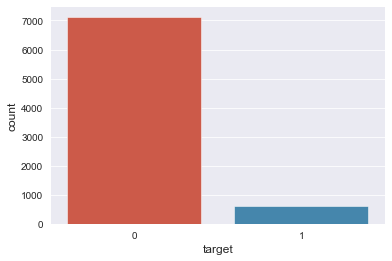

In [11]:
sns.countplot(train_df["target"])

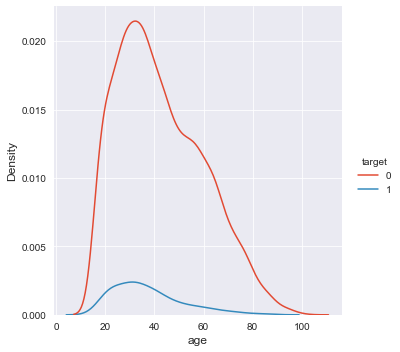

In [12]:
sns.displot( train_df , x = 'age', hue='target' , kind = 'kde')

In [13]:
train = train_df
test = test_df

In [14]:
le = LabelEncoder()

train.race = le.fit_transform(train.race).astype(np.uint8)
test.race = le.fit_transform(test.race).astype(np.uint8)

train.dwelling = le.fit_transform(train.dwelling).astype(np.uint8)
test.dwelling = le.fit_transform(test.dwelling).astype(np.uint8)

train.dwelling_type = le.fit_transform(train.dwelling_type).astype(np.uint8)
test.dwelling_type = le.fit_transform(test.dwelling_type).astype(np.uint8)

train.province_code = le.fit_transform(train.province_code).astype(np.uint8)
test.province_code = le.fit_transform(test.province_code).astype(np.uint8)

train.metro_code = le.fit_transform(train.metro_code).astype(np.uint8)
test.metro_code = le.fit_transform(test.metro_code).astype(np.uint8)

train.nationality	= le.fit_transform(train.nationality	).astype(np.uint8)
test.nationality = le.fit_transform(test.nationality	).astype(np.uint8)

train.RTH	= le.fit_transform(train.RTH).astype(np.uint8)
test.RTH= le.fit_transform(test.RTH).astype(np.uint8)

train.marital_st	= le.fit_transform(train.marital_st).astype(np.uint8)
test.marital_st= le.fit_transform(test.marital_st).astype(np.uint8)

train.Lang_inside	= le.fit_transform(train.Lang_inside	).astype(np.uint8)
test.Lang_inside= le.fit_transform(test.Lang_inside	).astype(np.uint8)

train.Lang_outside= le.fit_transform(train.Lang_outside	).astype(np.uint8)
test.Lang_outside	= le.fit_transform(test.Lang_outside).astype(np.uint8)

train.Education= le.fit_transform(train.Education).astype(np.uint8)
test.Education	= le.fit_transform(test.Education).astype(np.uint8)

train.nature_of_work	= le.fit_transform(train.nature_of_work	).astype(np.uint8)
test.nature_of_work	= le.fit_transform(test.nature_of_work	).astype(np.uint8)

train.lw_business	= le.fit_transform(train.lw_business).astype(np.uint8)
test.lw_business= le.fit_transform(test.lw_business	).astype(np.uint8)

train.lw_work	= le.fit_transform(train.lw_work).astype(np.uint8)
test.lw_work= le.fit_transform(test.lw_work).astype(np.uint8)

train.help_on_household	= le.fit_transform(train.help_on_household).astype(np.uint8)
test.help_on_household= le.fit_transform(test.help_on_household).astype(np.uint8)

train.job_or_business	= le.fit_transform(train.job_or_business).astype(np.uint8)
test.job_or_business= le.fit_transform(test.job_or_business).astype(np.uint8)


In [16]:
age_bin_labels = [1, 2, 3,4,5,6]
train['Binned_Age'] =  pd.qcut(train_df['age'], q=6, labels=age_bin_labels).astype(int)
test['Binned_Age'] =  pd.qcut(test_df['age'], q=6, labels=age_bin_labels).astype(int)

In [17]:
X = train.drop(['ID', 'target','gender','psu','age'], axis =1)
y = train.target

In [18]:
X = pd.get_dummies(X).astype('int32')

In [19]:
X.head()

,race,dwelling,dwelling_type,province_code,metro_code,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,Binned_Age
0,0,2,0,6,14,1,8,4,14,9,9,1,1,1,1,3,1
1,0,2,0,4,11,1,7,1,7,7,11,3,1,1,2,4,4
2,0,2,0,0,2,1,1,7,3,3,32,1,1,1,1,3,6
3,0,10,0,3,10,1,8,4,4,4,11,1,1,1,1,3,1
4,0,10,0,2,5,1,8,4,9,1,11,1,1,1,1,3,2


In [20]:
X.drop(X[X.lw_business == 'Do not know'].index, inplace=True)
X.drop(X[X.job_or_business == 'Do not know'].index, inplace=True)
X.drop(X[X.help_on_household == 'Do not know'].index, inplace=True)
X.drop(X[X.Lang_inside == 'Sign language'].index, inplace=True)
X.drop(X[X.Lang_inside == 'Khoi, Nama and San languages'].index, inplace=True)

In [21]:
print('Number of class 1 samples before:',X[y == 1].shape[0])

Number of class 1 samples before: 605


In [22]:
from sklearn.utils import resample

X_upsampled, y_upsampled = resample(X[y == 1],y[y == 1],replace=True,n_samples=X[y == 0].shape[0],random_state=50)
print('Number of class 1 samples after:',X_upsampled.shape[0])

Number of class 1 samples after: 7131


In [23]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

## MODEL BUILDING AND EVALUATION

In [25]:
cat = CatBoostClassifier(iterations=1500)
lgm = LGBMClassifier(n_estimators=1500)

classifier = [lgm,cat]
classifier_names = ['LR','CAT']

In [26]:
def pred (model):
    for i, model in enumerate(classifier):
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val,pred)
        print(f'{classifier_names[i]}:{roc}')

In [27]:
pred(classifier)

LR:0.5636963722969542
Learning rate set to 0.014341
0:	learn: 0.6779485	total: 270ms	remaining: 6m 44s
1:	learn: 0.6632873	total: 290ms	remaining: 3m 37s
2:	learn: 0.6492461	total: 299ms	remaining: 2m 29s
3:	learn: 0.6355730	total: 311ms	remaining: 1m 56s
4:	learn: 0.6225415	total: 317ms	remaining: 1m 34s
5:	learn: 0.6097449	total: 324ms	remaining: 1m 20s
6:	learn: 0.5974159	total: 331ms	remaining: 1m 10s
7:	learn: 0.5854046	total: 337ms	remaining: 1m 2s
8:	learn: 0.5736036	total: 342ms	remaining: 56.7s
9:	learn: 0.5627802	total: 345ms	remaining: 51.4s
10:	learn: 0.5521460	total: 350ms	remaining: 47.4s
11:	learn: 0.5418402	total: 355ms	remaining: 44s
12:	learn: 0.5317765	total: 360ms	remaining: 41.1s
13:	learn: 0.5221306	total: 364ms	remaining: 38.7s
14:	learn: 0.5123762	total: 369ms	remaining: 36.5s
15:	learn: 0.5034113	total: 374ms	remaining: 34.7s
16:	learn: 0.4950209	total: 379ms	remaining: 33s
17:	learn: 0.4863644	total: 383ms	remaining: 31.5s
18:	learn: 0.4784813	total: 388ms	rem

163:	learn: 0.2537038	total: 1.5s	remaining: 12.2s
164:	learn: 0.2535411	total: 1.5s	remaining: 12.2s
165:	learn: 0.2534030	total: 1.51s	remaining: 12.1s
166:	learn: 0.2532685	total: 1.52s	remaining: 12.1s
167:	learn: 0.2531503	total: 1.52s	remaining: 12.1s
168:	learn: 0.2530185	total: 1.53s	remaining: 12.1s
169:	learn: 0.2528800	total: 1.54s	remaining: 12.1s
170:	learn: 0.2527244	total: 1.55s	remaining: 12s
171:	learn: 0.2526097	total: 1.55s	remaining: 12s
172:	learn: 0.2524655	total: 1.56s	remaining: 12s
173:	learn: 0.2522821	total: 1.56s	remaining: 11.9s
174:	learn: 0.2521435	total: 1.57s	remaining: 11.9s
175:	learn: 0.2520141	total: 1.58s	remaining: 11.9s
176:	learn: 0.2518513	total: 1.58s	remaining: 11.8s
177:	learn: 0.2517252	total: 1.59s	remaining: 11.8s
178:	learn: 0.2515422	total: 1.59s	remaining: 11.8s
179:	learn: 0.2513308	total: 1.6s	remaining: 11.7s
180:	learn: 0.2511330	total: 1.6s	remaining: 11.7s
181:	learn: 0.2509602	total: 1.61s	remaining: 11.6s
182:	learn: 0.2507604	

339:	learn: 0.2353033	total: 2.75s	remaining: 9.4s
340:	learn: 0.2352503	total: 2.76s	remaining: 9.38s
341:	learn: 0.2351536	total: 2.77s	remaining: 9.37s
342:	learn: 0.2351110	total: 2.77s	remaining: 9.35s
343:	learn: 0.2349905	total: 2.78s	remaining: 9.33s
344:	learn: 0.2348604	total: 2.78s	remaining: 9.31s
345:	learn: 0.2347193	total: 2.79s	remaining: 9.3s
346:	learn: 0.2346010	total: 2.79s	remaining: 9.28s
347:	learn: 0.2345230	total: 2.8s	remaining: 9.26s
348:	learn: 0.2344570	total: 2.8s	remaining: 9.24s
349:	learn: 0.2344026	total: 2.81s	remaining: 9.23s
350:	learn: 0.2343450	total: 2.81s	remaining: 9.21s
351:	learn: 0.2342556	total: 2.82s	remaining: 9.19s
352:	learn: 0.2341410	total: 2.82s	remaining: 9.17s
353:	learn: 0.2341055	total: 2.83s	remaining: 9.15s
354:	learn: 0.2340491	total: 2.83s	remaining: 9.14s
355:	learn: 0.2339799	total: 2.84s	remaining: 9.12s
356:	learn: 0.2338846	total: 2.84s	remaining: 9.1s
357:	learn: 0.2338270	total: 2.85s	remaining: 9.08s
358:	learn: 0.233

523:	learn: 0.2216271	total: 3.78s	remaining: 7.04s
524:	learn: 0.2215694	total: 3.78s	remaining: 7.03s
525:	learn: 0.2214889	total: 3.79s	remaining: 7.02s
526:	learn: 0.2213996	total: 3.8s	remaining: 7.01s
527:	learn: 0.2213731	total: 3.8s	remaining: 7s
528:	learn: 0.2212977	total: 3.81s	remaining: 6.99s
529:	learn: 0.2212124	total: 3.81s	remaining: 6.97s
530:	learn: 0.2211836	total: 3.81s	remaining: 6.96s
531:	learn: 0.2211068	total: 3.82s	remaining: 6.95s
532:	learn: 0.2210538	total: 3.83s	remaining: 6.94s
533:	learn: 0.2209902	total: 3.83s	remaining: 6.93s
534:	learn: 0.2209354	total: 3.84s	remaining: 6.92s
535:	learn: 0.2208917	total: 3.84s	remaining: 6.91s
536:	learn: 0.2208390	total: 3.85s	remaining: 6.9s
537:	learn: 0.2207550	total: 3.85s	remaining: 6.89s
538:	learn: 0.2206859	total: 3.85s	remaining: 6.87s
539:	learn: 0.2206211	total: 3.86s	remaining: 6.86s
540:	learn: 0.2205254	total: 3.87s	remaining: 6.85s
541:	learn: 0.2204765	total: 3.87s	remaining: 6.84s
542:	learn: 0.2203

692:	learn: 0.2097144	total: 4.65s	remaining: 5.42s
693:	learn: 0.2096595	total: 4.66s	remaining: 5.41s
694:	learn: 0.2096075	total: 4.67s	remaining: 5.41s
695:	learn: 0.2095198	total: 4.68s	remaining: 5.4s
696:	learn: 0.2094494	total: 4.68s	remaining: 5.4s
697:	learn: 0.2093609	total: 4.69s	remaining: 5.39s
698:	learn: 0.2092768	total: 4.7s	remaining: 5.38s
699:	learn: 0.2092161	total: 4.7s	remaining: 5.37s
700:	learn: 0.2090995	total: 4.71s	remaining: 5.37s
701:	learn: 0.2090478	total: 4.71s	remaining: 5.36s
702:	learn: 0.2089781	total: 4.72s	remaining: 5.35s
703:	learn: 0.2089043	total: 4.72s	remaining: 5.34s
704:	learn: 0.2088260	total: 4.73s	remaining: 5.33s
705:	learn: 0.2087471	total: 4.74s	remaining: 5.33s
706:	learn: 0.2086763	total: 4.74s	remaining: 5.32s
707:	learn: 0.2086218	total: 4.75s	remaining: 5.31s
708:	learn: 0.2085645	total: 4.75s	remaining: 5.3s
709:	learn: 0.2084983	total: 4.75s	remaining: 5.29s
710:	learn: 0.2084587	total: 4.76s	remaining: 5.28s
711:	learn: 0.208

856:	learn: 0.1989181	total: 5.53s	remaining: 4.15s
857:	learn: 0.1988692	total: 5.53s	remaining: 4.14s
858:	learn: 0.1988289	total: 5.54s	remaining: 4.13s
859:	learn: 0.1987941	total: 5.54s	remaining: 4.13s
860:	learn: 0.1987343	total: 5.55s	remaining: 4.12s
861:	learn: 0.1986958	total: 5.55s	remaining: 4.11s
862:	learn: 0.1986172	total: 5.56s	remaining: 4.1s
863:	learn: 0.1985509	total: 5.57s	remaining: 4.1s
864:	learn: 0.1984268	total: 5.57s	remaining: 4.09s
865:	learn: 0.1983728	total: 5.58s	remaining: 4.08s
866:	learn: 0.1983260	total: 5.58s	remaining: 4.07s
867:	learn: 0.1982550	total: 5.58s	remaining: 4.07s
868:	learn: 0.1981624	total: 5.59s	remaining: 4.06s
869:	learn: 0.1981153	total: 5.59s	remaining: 4.05s
870:	learn: 0.1980727	total: 5.6s	remaining: 4.04s
871:	learn: 0.1980226	total: 5.61s	remaining: 4.04s
872:	learn: 0.1979061	total: 5.61s	remaining: 4.03s
873:	learn: 0.1978617	total: 5.62s	remaining: 4.02s
874:	learn: 0.1978345	total: 5.62s	remaining: 4.01s
875:	learn: 0.1

1017:	learn: 0.1900504	total: 6.4s	remaining: 3.03s
1018:	learn: 0.1899903	total: 6.41s	remaining: 3.02s
1019:	learn: 0.1899534	total: 6.41s	remaining: 3.02s
1020:	learn: 0.1899062	total: 6.42s	remaining: 3.01s
1021:	learn: 0.1898526	total: 6.42s	remaining: 3s
1022:	learn: 0.1897718	total: 6.43s	remaining: 3s
1023:	learn: 0.1897014	total: 6.43s	remaining: 2.99s
1024:	learn: 0.1896622	total: 6.44s	remaining: 2.98s
1025:	learn: 0.1896252	total: 6.45s	remaining: 2.98s
1026:	learn: 0.1895918	total: 6.45s	remaining: 2.97s
1027:	learn: 0.1895464	total: 6.46s	remaining: 2.96s
1028:	learn: 0.1894406	total: 6.46s	remaining: 2.96s
1029:	learn: 0.1894020	total: 6.47s	remaining: 2.95s
1030:	learn: 0.1893599	total: 6.47s	remaining: 2.94s
1031:	learn: 0.1892789	total: 6.48s	remaining: 2.94s
1032:	learn: 0.1892165	total: 6.48s	remaining: 2.93s
1033:	learn: 0.1891736	total: 6.49s	remaining: 2.92s
1034:	learn: 0.1891390	total: 6.49s	remaining: 2.92s
1035:	learn: 0.1890270	total: 6.5s	remaining: 2.91s
1

1177:	learn: 0.1811395	total: 7.42s	remaining: 2.03s
1178:	learn: 0.1810674	total: 7.43s	remaining: 2.02s
1179:	learn: 0.1810100	total: 7.44s	remaining: 2.02s
1180:	learn: 0.1809479	total: 7.44s	remaining: 2.01s
1181:	learn: 0.1809006	total: 7.45s	remaining: 2s
1182:	learn: 0.1808686	total: 7.45s	remaining: 2s
1183:	learn: 0.1808070	total: 7.46s	remaining: 1.99s
1184:	learn: 0.1806993	total: 7.46s	remaining: 1.98s
1185:	learn: 0.1806671	total: 7.47s	remaining: 1.98s
1186:	learn: 0.1806390	total: 7.47s	remaining: 1.97s
1187:	learn: 0.1805854	total: 7.48s	remaining: 1.96s
1188:	learn: 0.1805529	total: 7.48s	remaining: 1.96s
1189:	learn: 0.1805124	total: 7.49s	remaining: 1.95s
1190:	learn: 0.1804678	total: 7.49s	remaining: 1.94s
1191:	learn: 0.1804184	total: 7.5s	remaining: 1.94s
1192:	learn: 0.1803602	total: 7.5s	remaining: 1.93s
1193:	learn: 0.1802901	total: 7.51s	remaining: 1.92s
1194:	learn: 0.1802414	total: 7.51s	remaining: 1.92s
1195:	learn: 0.1801688	total: 7.52s	remaining: 1.91s
1

1342:	learn: 0.1728223	total: 8.46s	remaining: 990ms
1343:	learn: 0.1727704	total: 8.48s	remaining: 984ms
1344:	learn: 0.1727379	total: 8.49s	remaining: 978ms
1345:	learn: 0.1726997	total: 8.5s	remaining: 972ms
1346:	learn: 0.1726168	total: 8.51s	remaining: 966ms
1347:	learn: 0.1725847	total: 8.51s	remaining: 960ms
1348:	learn: 0.1725090	total: 8.52s	remaining: 953ms
1349:	learn: 0.1724561	total: 8.52s	remaining: 947ms
1350:	learn: 0.1724032	total: 8.53s	remaining: 941ms
1351:	learn: 0.1723524	total: 8.53s	remaining: 934ms
1352:	learn: 0.1723320	total: 8.54s	remaining: 928ms
1353:	learn: 0.1722796	total: 8.55s	remaining: 922ms
1354:	learn: 0.1722332	total: 8.55s	remaining: 915ms
1355:	learn: 0.1721965	total: 8.56s	remaining: 909ms
1356:	learn: 0.1720968	total: 8.56s	remaining: 902ms
1357:	learn: 0.1720271	total: 8.57s	remaining: 896ms
1358:	learn: 0.1719542	total: 8.6s	remaining: 892ms
1359:	learn: 0.1718866	total: 8.62s	remaining: 887ms
1360:	learn: 0.1718622	total: 8.62s	remaining: 8

CAT:0.586304030691609


In [28]:
X_train.shape

(5183, 17)

In [29]:
X_train.head()

,race,dwelling,dwelling_type,province_code,metro_code,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,Binned_Age
2582,0,4,0,2,8,0,5,2,6,1,2,1,1,1,1,3,3
47,0,2,0,2,8,1,4,7,8,4,17,1,1,1,1,3,5
6609,0,2,0,6,14,1,4,1,5,9,9,1,1,1,1,3,4
1350,0,2,0,2,7,1,8,4,3,3,9,1,1,1,1,3,1
7203,0,2,0,3,9,1,4,4,4,4,10,3,1,1,2,6,2


In [30]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,Binned_Age
0,ID_00241643,Female,23,1,1,0,7,13,36410104,1,...,4,0,0,8,3,0,0,1,4,1
1,ID_00312043,Female,64,0,1,0,4,11,97410477,1,...,7,0,0,11,1,0,0,0,3,6
2,ID_00345323,Female,18,0,11,2,0,0,26011572,1,...,4,3,3,9,1,0,0,0,3,1
3,ID_00369643,Female,19,0,1,0,5,12,87710674,1,...,4,12,7,11,1,0,0,0,3,1
4,ID_00381163,Female,24,0,1,0,5,12,87411106,1,...,4,9,10,9,1,0,0,0,3,1


In [31]:
test_features = test.drop(['ID','gender','psu','age'], axis =1)

In [32]:
test_features.shape

(3316, 17)

In [33]:
test_features.head()

,race,dwelling,dwelling_type,province_code,metro_code,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,Binned_Age
0,1,1,0,7,13,1,4,4,0,0,8,3,0,0,1,4,1
1,0,1,0,4,11,1,4,7,0,0,11,1,0,0,0,3,6
2,0,11,2,0,0,1,8,4,3,3,9,1,0,0,0,3,1
3,0,1,0,5,12,1,8,4,12,7,11,1,0,0,0,3,1
4,0,1,0,5,12,1,4,4,9,10,9,1,0,0,0,3,1


In [34]:
#lgm = LGBMClassifier(n_estimators=1500)
#lgm.fit(X, y)
#test_predi = lgm.predict_proba(test_features)[:,1]

cat = CatBoostClassifier(iterations=1500)
cat.fit(X, y)
test_predi = cat.predict_proba(test_features)[:,1]

#vcf = VotingClassifier(estimators=[('lr', lgm),('cat',cat)], voting='soft')
#vcf.fit(X,y)
#test_predi = vcf.predict_proba(test_features)[:,1]

Learning rate set to 0.017016
0:	learn: 0.6755325	total: 27ms	remaining: 40.5s
1:	learn: 0.6585138	total: 44ms	remaining: 33s
2:	learn: 0.6424282	total: 53ms	remaining: 26.5s
3:	learn: 0.6268969	total: 61.4ms	remaining: 23s
4:	learn: 0.6121490	total: 67.3ms	remaining: 20.1s
5:	learn: 0.5978104	total: 75.1ms	remaining: 18.7s
6:	learn: 0.5838402	total: 83ms	remaining: 17.7s
7:	learn: 0.5707232	total: 90.3ms	remaining: 16.8s
8:	learn: 0.5577852	total: 97.8ms	remaining: 16.2s
9:	learn: 0.5459466	total: 103ms	remaining: 15.4s
10:	learn: 0.5341403	total: 111ms	remaining: 15s
11:	learn: 0.5228567	total: 118ms	remaining: 14.6s
12:	learn: 0.5120234	total: 125ms	remaining: 14.3s
13:	learn: 0.5017637	total: 133ms	remaining: 14.1s
14:	learn: 0.4920432	total: 140ms	remaining: 13.9s
15:	learn: 0.4827011	total: 148ms	remaining: 13.7s
16:	learn: 0.4738625	total: 155ms	remaining: 13.5s
17:	learn: 0.4652000	total: 163ms	remaining: 13.4s
18:	learn: 0.4570692	total: 170ms	remaining: 13.3s
19:	learn: 0.449

180:	learn: 0.2570264	total: 1.25s	remaining: 9.14s
181:	learn: 0.2568866	total: 1.26s	remaining: 9.14s
182:	learn: 0.2567742	total: 1.27s	remaining: 9.13s
183:	learn: 0.2566762	total: 1.28s	remaining: 9.13s
184:	learn: 0.2565270	total: 1.28s	remaining: 9.12s
185:	learn: 0.2564274	total: 1.29s	remaining: 9.11s
186:	learn: 0.2563456	total: 1.3s	remaining: 9.1s
187:	learn: 0.2562679	total: 1.3s	remaining: 9.09s
188:	learn: 0.2561348	total: 1.31s	remaining: 9.08s
189:	learn: 0.2560121	total: 1.31s	remaining: 9.07s
190:	learn: 0.2559160	total: 1.32s	remaining: 9.06s
191:	learn: 0.2558189	total: 1.33s	remaining: 9.05s
192:	learn: 0.2557131	total: 1.33s	remaining: 9.04s
193:	learn: 0.2556385	total: 1.34s	remaining: 9.03s
194:	learn: 0.2555230	total: 1.35s	remaining: 9.02s
195:	learn: 0.2554607	total: 1.35s	remaining: 9.01s
196:	learn: 0.2553764	total: 1.36s	remaining: 9s
197:	learn: 0.2552876	total: 1.37s	remaining: 8.98s
198:	learn: 0.2552438	total: 1.37s	remaining: 8.98s
199:	learn: 0.2551

341:	learn: 0.2451630	total: 2.34s	remaining: 7.93s
342:	learn: 0.2451081	total: 2.35s	remaining: 7.92s
343:	learn: 0.2450213	total: 2.35s	remaining: 7.92s
344:	learn: 0.2450140	total: 2.36s	remaining: 7.91s
345:	learn: 0.2449256	total: 2.37s	remaining: 7.91s
346:	learn: 0.2448234	total: 2.38s	remaining: 7.9s
347:	learn: 0.2447412	total: 2.38s	remaining: 7.89s
348:	learn: 0.2446463	total: 2.39s	remaining: 7.89s
349:	learn: 0.2445751	total: 2.4s	remaining: 7.88s
350:	learn: 0.2445046	total: 2.4s	remaining: 7.87s
351:	learn: 0.2444566	total: 2.41s	remaining: 7.87s
352:	learn: 0.2443698	total: 2.42s	remaining: 7.86s
353:	learn: 0.2443062	total: 2.42s	remaining: 7.85s
354:	learn: 0.2442222	total: 2.43s	remaining: 7.84s
355:	learn: 0.2441659	total: 2.44s	remaining: 7.84s
356:	learn: 0.2441284	total: 2.44s	remaining: 7.83s
357:	learn: 0.2440813	total: 2.45s	remaining: 7.82s
358:	learn: 0.2439911	total: 2.46s	remaining: 7.82s
359:	learn: 0.2439067	total: 2.46s	remaining: 7.81s
360:	learn: 0.2

505:	learn: 0.2351945	total: 3.59s	remaining: 7.05s
506:	learn: 0.2351339	total: 3.6s	remaining: 7.06s
507:	learn: 0.2350545	total: 3.61s	remaining: 7.06s
508:	learn: 0.2349957	total: 3.63s	remaining: 7.06s
509:	learn: 0.2349329	total: 3.63s	remaining: 7.05s
510:	learn: 0.2348929	total: 3.64s	remaining: 7.05s
511:	learn: 0.2348450	total: 3.65s	remaining: 7.04s
512:	learn: 0.2347975	total: 3.66s	remaining: 7.04s
513:	learn: 0.2347602	total: 3.67s	remaining: 7.03s
514:	learn: 0.2346982	total: 3.67s	remaining: 7.03s
515:	learn: 0.2346159	total: 3.68s	remaining: 7.02s
516:	learn: 0.2344773	total: 3.69s	remaining: 7.02s
517:	learn: 0.2344176	total: 3.7s	remaining: 7.02s
518:	learn: 0.2343318	total: 3.71s	remaining: 7.02s
519:	learn: 0.2342491	total: 3.72s	remaining: 7.02s
520:	learn: 0.2342130	total: 3.73s	remaining: 7.01s
521:	learn: 0.2341325	total: 3.74s	remaining: 7.01s
522:	learn: 0.2340355	total: 3.75s	remaining: 7.01s
523:	learn: 0.2339807	total: 3.76s	remaining: 7.01s
524:	learn: 0.

688:	learn: 0.2231141	total: 5s	remaining: 5.88s
689:	learn: 0.2230231	total: 5s	remaining: 5.87s
690:	learn: 0.2229573	total: 5.02s	remaining: 5.87s
691:	learn: 0.2229148	total: 5.02s	remaining: 5.87s
692:	learn: 0.2228657	total: 5.03s	remaining: 5.86s
693:	learn: 0.2228038	total: 5.04s	remaining: 5.85s
694:	learn: 0.2227539	total: 5.04s	remaining: 5.84s
695:	learn: 0.2226987	total: 5.05s	remaining: 5.83s
696:	learn: 0.2226385	total: 5.06s	remaining: 5.83s
697:	learn: 0.2225772	total: 5.06s	remaining: 5.82s
698:	learn: 0.2225263	total: 5.07s	remaining: 5.81s
699:	learn: 0.2224868	total: 5.08s	remaining: 5.8s
700:	learn: 0.2224434	total: 5.08s	remaining: 5.79s
701:	learn: 0.2223991	total: 5.09s	remaining: 5.79s
702:	learn: 0.2223644	total: 5.1s	remaining: 5.78s
703:	learn: 0.2222997	total: 5.1s	remaining: 5.77s
704:	learn: 0.2222459	total: 5.11s	remaining: 5.76s
705:	learn: 0.2221684	total: 5.12s	remaining: 5.75s
706:	learn: 0.2220864	total: 5.12s	remaining: 5.75s
707:	learn: 0.2220509

848:	learn: 0.2139932	total: 6.23s	remaining: 4.78s
849:	learn: 0.2139355	total: 6.24s	remaining: 4.78s
850:	learn: 0.2138867	total: 6.25s	remaining: 4.77s
851:	learn: 0.2138216	total: 6.26s	remaining: 4.76s
852:	learn: 0.2137975	total: 6.28s	remaining: 4.76s
853:	learn: 0.2137502	total: 6.29s	remaining: 4.76s
854:	learn: 0.2137043	total: 6.3s	remaining: 4.75s
855:	learn: 0.2136114	total: 6.31s	remaining: 4.75s
856:	learn: 0.2135063	total: 6.33s	remaining: 4.75s
857:	learn: 0.2134561	total: 6.34s	remaining: 4.74s
858:	learn: 0.2134221	total: 6.36s	remaining: 4.75s
859:	learn: 0.2133817	total: 6.38s	remaining: 4.75s
860:	learn: 0.2132437	total: 6.4s	remaining: 4.75s
861:	learn: 0.2131485	total: 6.42s	remaining: 4.75s
862:	learn: 0.2130719	total: 6.43s	remaining: 4.75s
863:	learn: 0.2130323	total: 6.45s	remaining: 4.74s
864:	learn: 0.2130032	total: 6.47s	remaining: 4.75s
865:	learn: 0.2129513	total: 6.48s	remaining: 4.74s
866:	learn: 0.2128903	total: 6.49s	remaining: 4.74s
867:	learn: 0.

1010:	learn: 0.2050910	total: 7.83s	remaining: 3.79s
1011:	learn: 0.2050800	total: 7.83s	remaining: 3.78s
1012:	learn: 0.2050531	total: 7.84s	remaining: 3.77s
1013:	learn: 0.2049714	total: 7.85s	remaining: 3.76s
1014:	learn: 0.2049360	total: 7.86s	remaining: 3.75s
1015:	learn: 0.2048967	total: 7.87s	remaining: 3.75s
1016:	learn: 0.2048391	total: 7.87s	remaining: 3.74s
1017:	learn: 0.2047636	total: 7.88s	remaining: 3.73s
1018:	learn: 0.2047220	total: 7.89s	remaining: 3.72s
1019:	learn: 0.2046905	total: 7.9s	remaining: 3.72s
1020:	learn: 0.2046402	total: 7.91s	remaining: 3.71s
1021:	learn: 0.2045897	total: 7.91s	remaining: 3.7s
1022:	learn: 0.2045464	total: 7.92s	remaining: 3.69s
1023:	learn: 0.2044889	total: 7.93s	remaining: 3.69s
1024:	learn: 0.2044067	total: 7.94s	remaining: 3.68s
1025:	learn: 0.2043501	total: 7.95s	remaining: 3.67s
1026:	learn: 0.2043104	total: 7.96s	remaining: 3.66s
1027:	learn: 0.2042521	total: 7.96s	remaining: 3.66s
1028:	learn: 0.2042221	total: 7.97s	remaining: 3

1179:	learn: 0.1972729	total: 9.06s	remaining: 2.46s
1180:	learn: 0.1972414	total: 9.06s	remaining: 2.45s
1181:	learn: 0.1972090	total: 9.07s	remaining: 2.44s
1182:	learn: 0.1971629	total: 9.08s	remaining: 2.43s
1183:	learn: 0.1971233	total: 9.09s	remaining: 2.42s
1184:	learn: 0.1971027	total: 9.09s	remaining: 2.42s
1185:	learn: 0.1970736	total: 9.1s	remaining: 2.41s
1186:	learn: 0.1970199	total: 9.1s	remaining: 2.4s
1187:	learn: 0.1969373	total: 9.11s	remaining: 2.39s
1188:	learn: 0.1969027	total: 9.12s	remaining: 2.38s
1189:	learn: 0.1968473	total: 9.12s	remaining: 2.38s
1190:	learn: 0.1968247	total: 9.13s	remaining: 2.37s
1191:	learn: 0.1967814	total: 9.14s	remaining: 2.36s
1192:	learn: 0.1967461	total: 9.14s	remaining: 2.35s
1193:	learn: 0.1967064	total: 9.15s	remaining: 2.34s
1194:	learn: 0.1966433	total: 9.16s	remaining: 2.34s
1195:	learn: 0.1966038	total: 9.16s	remaining: 2.33s
1196:	learn: 0.1965694	total: 9.17s	remaining: 2.32s
1197:	learn: 0.1965267	total: 9.17s	remaining: 2.

1342:	learn: 0.1909238	total: 10.1s	remaining: 1.18s
1343:	learn: 0.1908682	total: 10.1s	remaining: 1.18s
1344:	learn: 0.1908328	total: 10.1s	remaining: 1.17s
1345:	learn: 0.1908133	total: 10.2s	remaining: 1.16s
1346:	learn: 0.1907647	total: 10.2s	remaining: 1.15s
1347:	learn: 0.1907109	total: 10.2s	remaining: 1.15s
1348:	learn: 0.1906749	total: 10.2s	remaining: 1.14s
1349:	learn: 0.1906589	total: 10.2s	remaining: 1.13s
1350:	learn: 0.1906220	total: 10.2s	remaining: 1.12s
1351:	learn: 0.1905985	total: 10.2s	remaining: 1.12s
1352:	learn: 0.1905772	total: 10.2s	remaining: 1.11s
1353:	learn: 0.1905514	total: 10.2s	remaining: 1.1s
1354:	learn: 0.1905336	total: 10.2s	remaining: 1.09s
1355:	learn: 0.1904887	total: 10.2s	remaining: 1.08s
1356:	learn: 0.1904646	total: 10.2s	remaining: 1.08s
1357:	learn: 0.1904269	total: 10.2s	remaining: 1.07s
1358:	learn: 0.1904018	total: 10.2s	remaining: 1.06s
1359:	learn: 0.1903505	total: 10.2s	remaining: 1.05s
1360:	learn: 0.1903070	total: 10.3s	remaining: 

In [35]:
test_original = pd.read_csv('test.csv')

final_sub = pd.DataFrame({'ID':test_original.ID,
                          'target': test_predi})
final_sub.to_csv('sumbmission_fin.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...


In [36]:
final_sub.head()

,ID,target
0,ID_00241643,0.125913
1,ID_00312043,0.052912
2,ID_00345323,0.145956
3,ID_00369643,0.070475
4,ID_00381163,0.045911
